In [32]:
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_csv("../data/data_train.csv",sep=';')
df.head()

,RiderID,Index,Date,Time,Average_Gradient,Max_Gradient,Distance,Highest_point,Lowest_point,Measured_time,Moving_time,Average_heart_rate,Max_heart_rate,Speed,Power,Cadence
0,1,78294,2015-02-09,05:50:12,0.0,5.0,9980.400,128.4,124.6,1375,1375,105.8,114,7.258473,92.4,85.3
1,1,62861,2014-08-23,12:52:26,3.3,16.0,1666.010,204.6,147.9,252,252,157.5,170,6.611151,271.9,88.3
2,1,88658,2014-09-30,06:19:38,0.0,0.0,345.600,59.0,59.0,36,36,158.9,160,9.600000,274.4,103.4
3,1,77748,2015-02-21,14:25:18,-8.3,-0.5,1572.900,617.8,487.2,123,123,99.1,104,12.787805,72.8,66.4
4,1,64485,2012-08-24,06:34:28,-7.6,-4.8,435.352,54.4,21.4,59,59,100.3,111,7.378847,4.9,60.3


In [5]:
df.describe()

,RiderID,Index,Average_Gradient,Max_Gradient,Distance,Highest_point,Lowest_point,Measured_time,Moving_time,Average_heart_rate,Max_heart_rate,Speed,Power,Cadence
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,8.000000,50360.360990,0.399178,5.986031,1707.936726,61.605262,45.173906,224.368048,207.548981,136.473901,146.755324,8.472088,192.958637,81.253162
std,4.320514,32058.767442,2.162644,5.701446,3340.631037,306.358740,302.191925,568.416555,414.041527,21.557472,21.302934,2.299813,90.518402,14.630036
min,1.000000,1.000000,-17.000000,-9.700000,44.500000,-160.600000,-168.000000,20.000000,-1357.000000,0.000000,0.000000,0.012492,0.000000,0.000000
25%,4.000000,24841.750000,-0.400000,2.100000,445.060000,11.800000,3.400000,54.000000,53.000000,122.500000,133.000000,7.135620,133.400000,75.000000
50%,8.000000,45570.500000,0.000000,4.600000,793.807000,24.100000,12.300000,97.000000,96.000000,137.800000,149.000000,8.509053,180.700000,83.200000
75%,12.000000,70336.250000,0.800000,8.300000,1642.820000,52.325000,37.000000,201.000000,195.000000,152.200000,162.000000,9.896144,240.900000,89.700000
max,15.000000,150596.000000,29.000000,29.800000,151757.000000,6892.800000,6892.800000,53874.000000,18488.000000,252.800000,254.000000,47.965327,1274.700000,191.000000


In [6]:
df.columns

Index([u'RiderID', u'Index', u'Date', u'Time', u'Average_Gradient',
       u'Max_Gradient', u'Distance', u'Highest_point', u'Lowest_point',
       u'Measured_time', u'Moving_time', u'Average_heart_rate',
       u'Max_heart_rate', u'Speed', u'Power', u'Cadence'],
      dtype='object')

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
print("Some Statistics of the Cadence:\n")
print(df['Cadence'].describe())
print("\nThe median of the Cadence is: ", df['Cadence'].median(axis = 0))

Some Statistics of the Cadence:

count    105000.000000
mean         81.253162
std          14.630036
min           0.000000
25%          75.000000
50%          83.200000
75%          89.700000
max         191.000000
Name: Cadence, dtype: float64
('\nThe median of the Cadence is: ', 83.2)


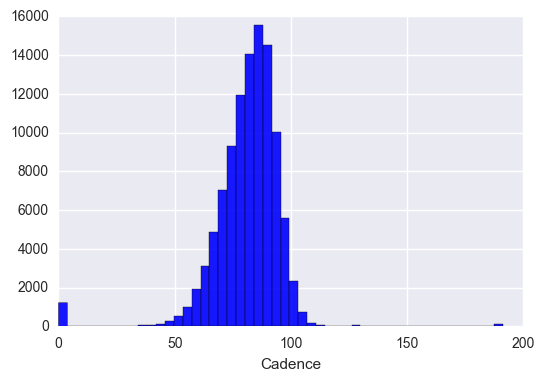

In [10]:
sns.distplot(df['Cadence'], kde = False, color='b', hist_kws={'alpha': 0.9})

## Numerical Features

In [17]:
df.RiderID = df.RiderID.astype('category')
df.Index = df.Index.astype('category')

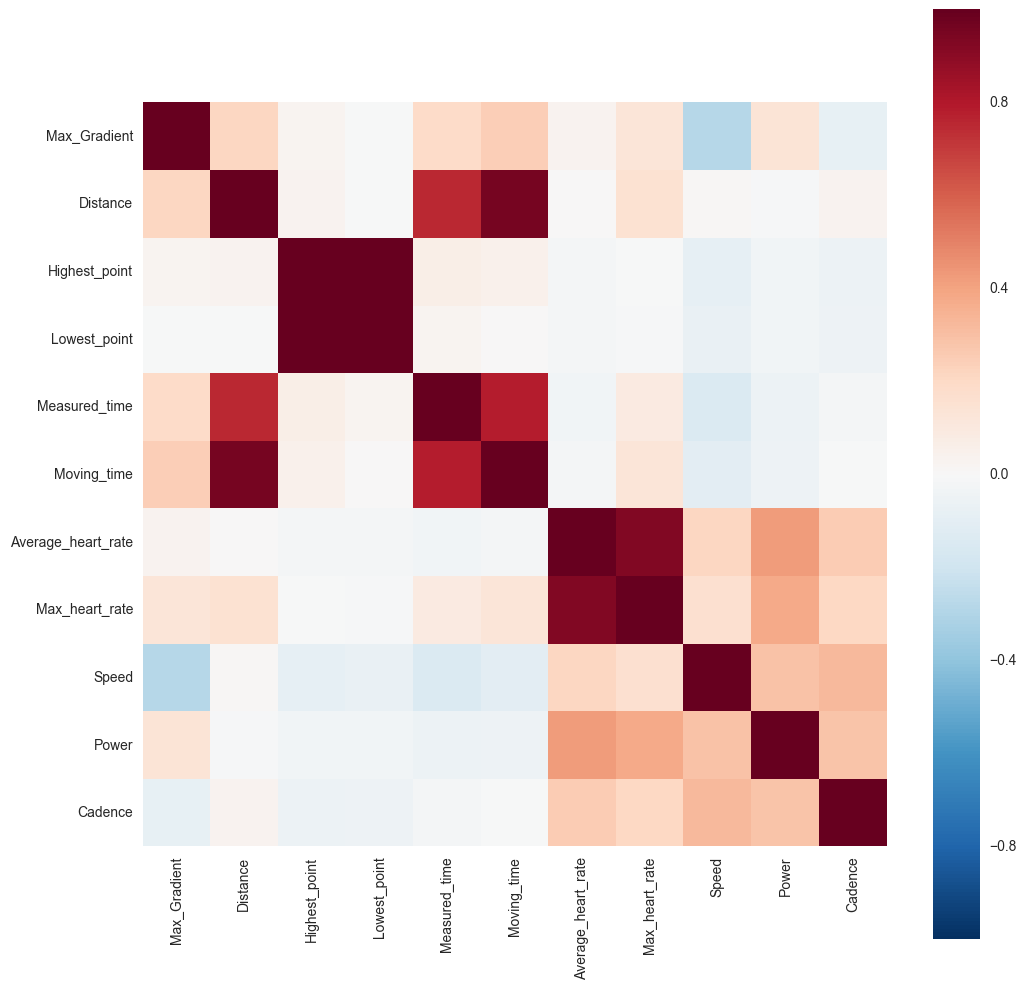

In [18]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax = 1, square=True)

In [19]:
cor_dict = corr['Cadence'].to_dict()
del cor_dict['Cadence']
print("List the numerical features decendingly by their correlation with Cadence:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Cadence:

Speed: 	0.323673503344
Power: 	0.285723715905
Average_heart_rate: 	0.257032045408
Max_heart_rate: 	0.209052545011
Max_Gradient: 	-0.0791531259027
Highest_point: 	-0.0624420155323
Lowest_point: 	-0.05174204108
Distance: 	0.0328304339761
Measured_time: 	-0.0215044936289
Moving_time: 	-0.00731791180883


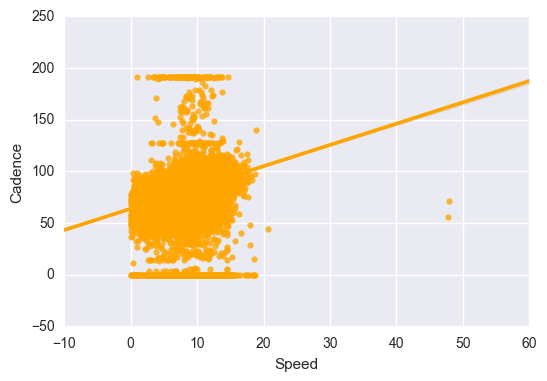

In [21]:
sns.regplot(x = 'Speed', y = 'Cadence', data = df, color = 'Orange')

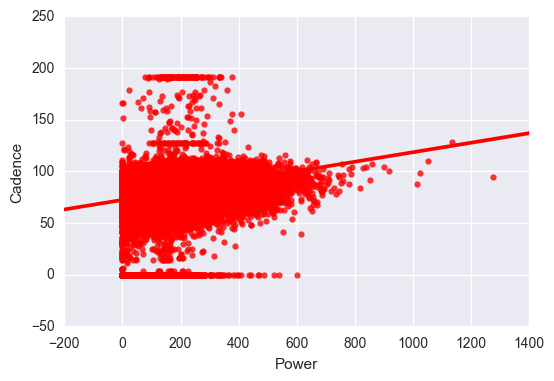

In [23]:
sns.regplot(x = 'Power', y = 'Cadence', data = df, color = 'Red')

# Categorical Features

In [25]:
print(df.select_dtypes(include=['object','category']).columns.values)

['RiderID' 'Index' 'Date' 'Time']


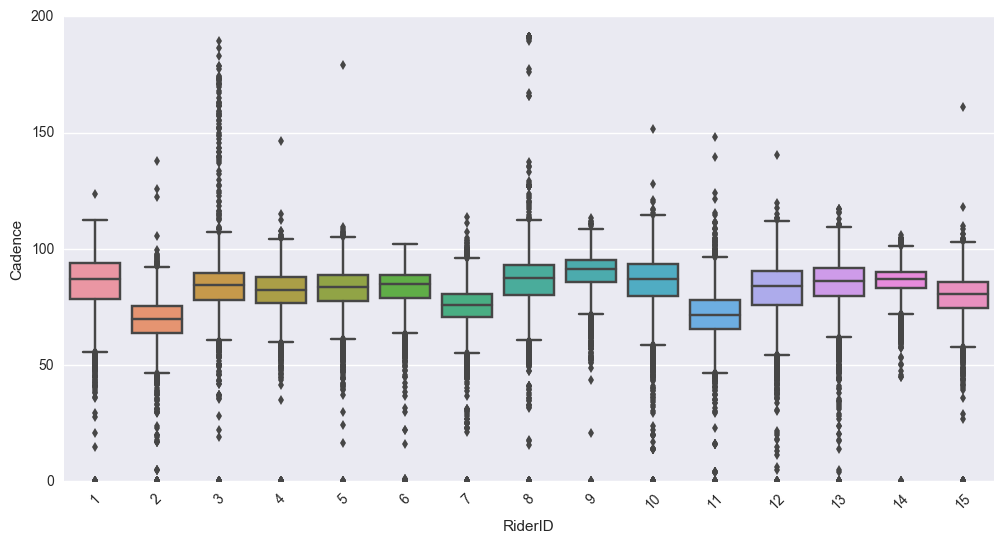

In [27]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RiderID', y = 'Cadence', data = df)
xt = plt.xticks(rotation=45)

In [37]:
df.Time = pd.to_datetime(df.Time)

In [45]:
df['Hour'] = df.Time.apply(lambda time: time.hour)

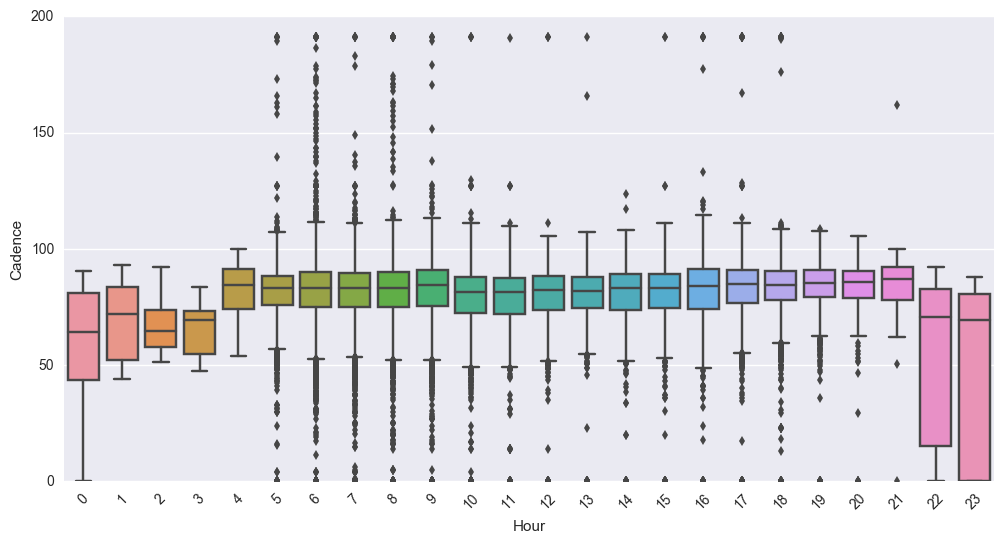

In [47]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Hour', y = 'Cadence', data = df)
xt = plt.xticks(rotation=45)